# quick plot of Chl a in REGIMES

In [1]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)
require(scales, warn.conflicts = FALSE)

require(oce, warn.conflicts = FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: cowplot
Loading required package: scales
Loading required package: oce
Loading required package: testthat

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: gsw


## interpolation depth

In [2]:
zz <- seq(0, 100, 1)

# get MLD depth

In [12]:
# read MLD and euphotic depth file
MLD2EuZ <- read.csv("../DATA_processed/MLD2EuZ.csv")

# read Date column
MLD2EuZ$date <- as.Date(MLD2EuZ$Date, format="%Y-%m-%d")

str(MLD2EuZ)

'data.frame':	198 obs. of  9 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CruiseID: Factor w/ 198 levels "93HG_001","93HG_002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Date    : Factor w/ 198 levels "1995-11-08","1995-12-13",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MLD2015 : int  NA NA 36 28 28 32 12 21 14 22 ...
 $ MLD2019 : num  24.14 18.1 10.06 8.05 10.06 ...
 $ x0.1    : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x1      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ x10     : num  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Date, format: "1995-11-08" "1995-12-13" ...


# GET all HPLC data and combine into one big file!

In [4]:
#BBSR
BBSR <- read.csv("FirstDataAnalysis/ChemTax_BBSR.csv")
BBSR$chl.a <- as.numeric(BBSR$chl.a)
#Mote
Mote <- read.csv("FirstDataAnalysis/ChemTax_Mote.csv")
Mote$chl.a <- as.numeric(Mote$chl.a)
#HPL
HPL <- read.csv("FirstDataAnalysis/ChemTax_HPL.csv")
HPL$chl.a <- as.numeric(HPL$chl.a)
#Missing
Missing <- read.csv("FirstDataAnalysis/ChemTax_Missing.csv")
Missing$chl.a <- as.numeric(Missing$chl.a)/1000

BBSR$date <- as.Date(BBSR$date, format="%m/%d/%y")
Mote$date <- as.Date(Mote$date, format="%Y-%m-%d")
HPL$date <- as.Date(HPL$date, format="%Y-%m-%d")
Missing$date <- as.Date(Missing$date, format="%Y-%m-%d")

In [5]:
HPLC <- rbind(BBSR,Mote,HPL,Missing)

In [6]:
str(HPLC)

'data.frame':	1210 obs. of  17 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date          : int  19951214 19951214 19951214 19951214 19951214 19951214 19951214 19951214 19960113 19960113 ...
 $ Cruise_ID     : Factor w/ 138 levels "93HG_002","93HG_003",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ depth         : int  1 7 15 25 35 55 75 100 1 7 ...
 $ chl.c1.c2     : num  0.004 0.002 0.004 0.021 0.011 0.002 0.001 0 0.211 0.201 ...
 $ chl.c3        : chr  "0" "0" "0" "0.014" ...
 $ peridinin     : chr  "0.005" "0.006" "0.01" "0.008" ...
 $ but.fuco      : chr  "0.002" "0.002" "0.003" "0.021" ...
 $ fucoxanthin   : num  0.008 0.009 0.008 0.065 0.034 0.009 0.007 0.002 0.694 0.599 ...
 $ hex.fuco      : chr  "0.008" "0.01" "0.011" "0.086" ...
 $ prasinoxanthin: chr  "0.003" "0.004" "0.003" "0.015" ...
 $ lutein        : chr  "0" "0" "0" "0" ...
 $ alloxanthin   : chr  "0" "0.001" "0.001" "0.006" ...
 $ zeaxanthin    : chr  "0.004" "0.008" "0.008" "0.024" ...
 $ chl.b         : chr  "0.0

In [7]:
ChlA <- HPLC %>%
  select(date, chl.a, depth) %>%
  gather(key='key',value = "value", -date, -depth)
str(ChlA)

'data.frame':	1210 obs. of  4 variables:
 $ date : Date, format: "1995-12-14" "1995-12-14" ...
 $ depth: int  1 7 15 25 35 55 75 100 1 7 ...
 $ key  : chr  "chl.a" "chl.a" "chl.a" "chl.a" ...
 $ value: num  0.107 0.139 0.163 0.408 0.241 ...


Warning message:
“Removed 90 rows containing missing values (geom_point).”

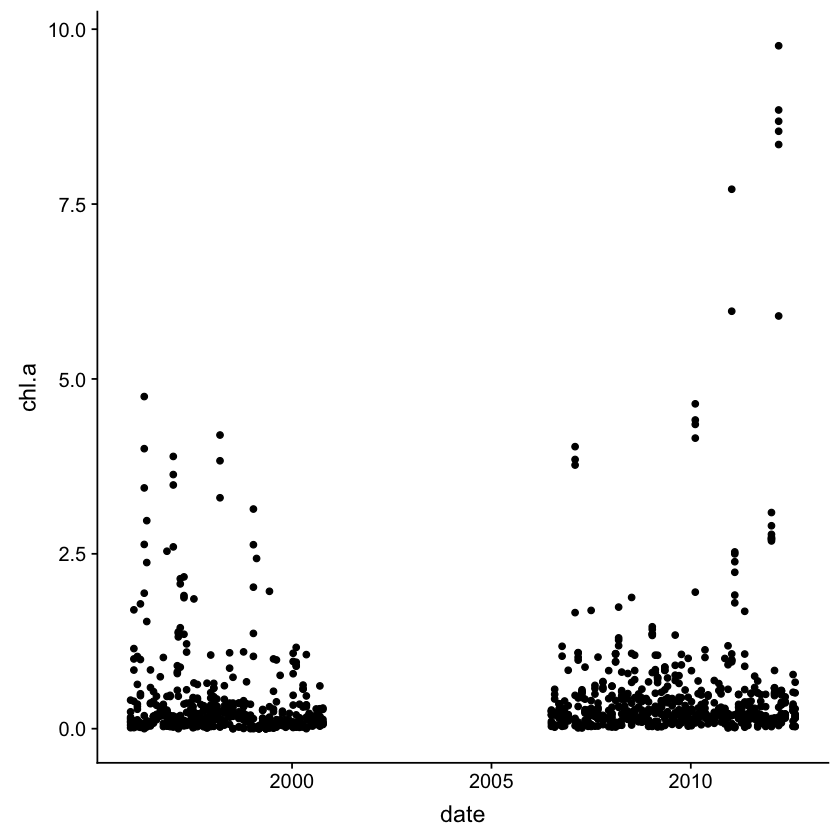

In [8]:
ggplot(data=HPLC)+geom_point(aes(x=date,y=chl.a))

In [9]:
ChlA_int <- ChlA %>%
    group_by(date) %>%
    do(data.frame(value_int = with(.,oceApprox(depth, value, zz, "rr")), depth = zz)) 

Warning message:
“Removed 101 rows containing missing values (geom_point).”

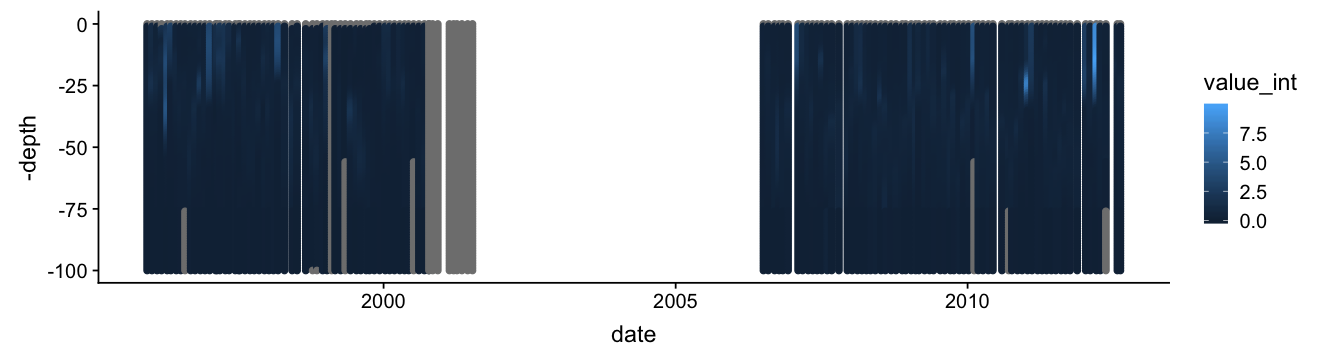

In [10]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot(ChlA_int, aes(x=date,y=-depth,col=value_int))+geom_point()

In [13]:
merge_ChlA_mld <- merge(ChlA_int, MLD2EuZ, by="date")

merge_ChlA_mld$depthdiff <- merge_ChlA_mld$MLD2015 - merge_ChlA_mld$depth

In [17]:
ChlA_above_mld <- merge_ChlA_mld %>%
  group_by(date) %>% # this groups it by the run number 
  filter(depthdiff > 0) %>% # only keep values above MLD
  summarize(ChlA=mean(value_int, na.rm=T))

head(ChlA_above_mld)
#niskin_at_mld_filtered <- niskin_at_mld[niskin_at_mld$depthdiff>-15,] # only take values up to 17 meters below MLD

date,ChlA
1996-03-13,0.8109616
1996-10-09,0.2115932
1997-03-13,1.4759780
1997-05-10,1.0192925
1997-06-17,0.2591911
1997-07-08,0.2949479


Warning message:
“Removed 8 rows containing missing values (geom_point).”

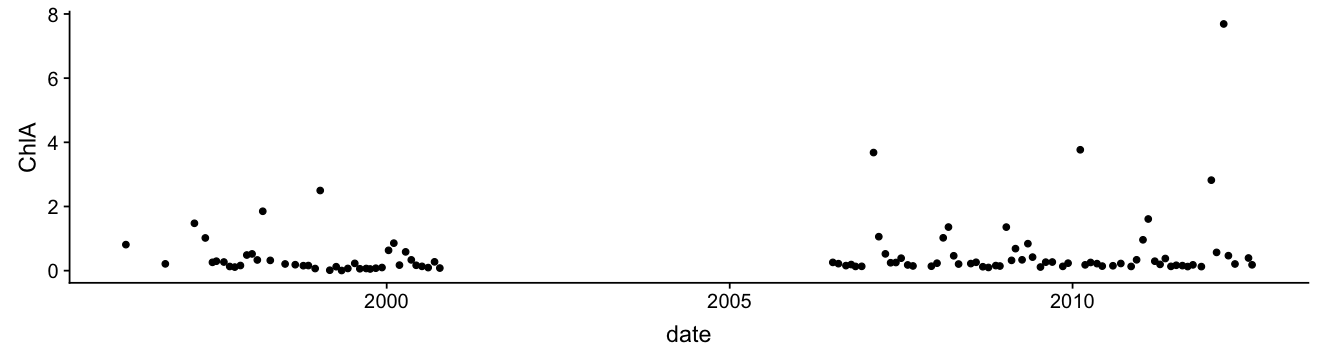

In [18]:
#ggplot() + geom_point(data=SST_above_mld, aes(x=Date,y=depthdiff))
ggplot() + geom_point(data=ChlA_above_mld, aes(x=date, y=ChlA))

In [19]:
# create day of year and month columsn for aggregate plotting
ChlA_above_mld$dyear <- as.Date(format(ChlA_above_mld$date, format="%m-%d"),format="%m-%d")

ChlA_above_mld$month <- format(ChlA_above_mld$date, format="%m")

#split data into two regimes:
ChlA_above_mld_R1 <- ChlA_above_mld[!ChlA_above_mld$date>as.Date('2000-10-30') & !ChlA_above_mld$date<as.Date('1996-01-01'),]
ChlA_above_mld_R2 <- ChlA_above_mld[!ChlA_above_mld$date<as.Date('2006-06-30') & !ChlA_above_mld$date>as.Date('2010-12-31'),]

In [20]:
ChlA_above_R1ctDate <- as.POSIXlt(ChlA_above_mld_R1$date)
ChlA_above_R2ctDate <- as.POSIXlt(ChlA_above_mld_R2$date)

ChlA_above_R1yday <- ChlA_above_R1ctDate$yday
ChlA_above_R2yday <- ChlA_above_R2ctDate$yday

In [21]:
str(ChlA_above_mld_R1)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	42 obs. of  4 variables:
 $ date : Date, format: "1996-03-13" "1996-10-09" ...
 $ ChlA : num  0.811 0.212 1.476 1.019 0.259 ...
 $ dyear: Date, format: "2019-03-13" "2019-10-09" ...
 $ month: chr  "03" "10" "03" "05" ...


In [22]:
options(repr.plot.width=11, repr.plot.height=3)

ChlA_1 <- ggplot() + geom_point(data=ChlA_above_mld_R1,aes(x=dyear, y=ChlA, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=ChlA_above_mld_R2,aes(x=dyear, y=ChlA, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('ChlA [mg/l]') + xlab('Month of year') + labs(col='Regime')

In [23]:
# plot boxplot of distribution over the year per group
ChlA_2 <- ggplot() + geom_boxplot(data=ChlA_above_mld_R1,aes(x=reorder(month,dyear), y=ChlA, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(70,0), breaks=seq(70,0,-10))+
geom_boxplot(data=ChlA_above_mld_R2,aes(x=reorder(month,dyear), y=ChlA, col='Regime 2'), alpha=0.5)+ 
scale_x_discrete(limits=c("01","02","03","04","05","06","07","08","09","10","11","12"))+
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('ChlA [mg/l]') + xlab('Month of year') + labs(col='Regime')

Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

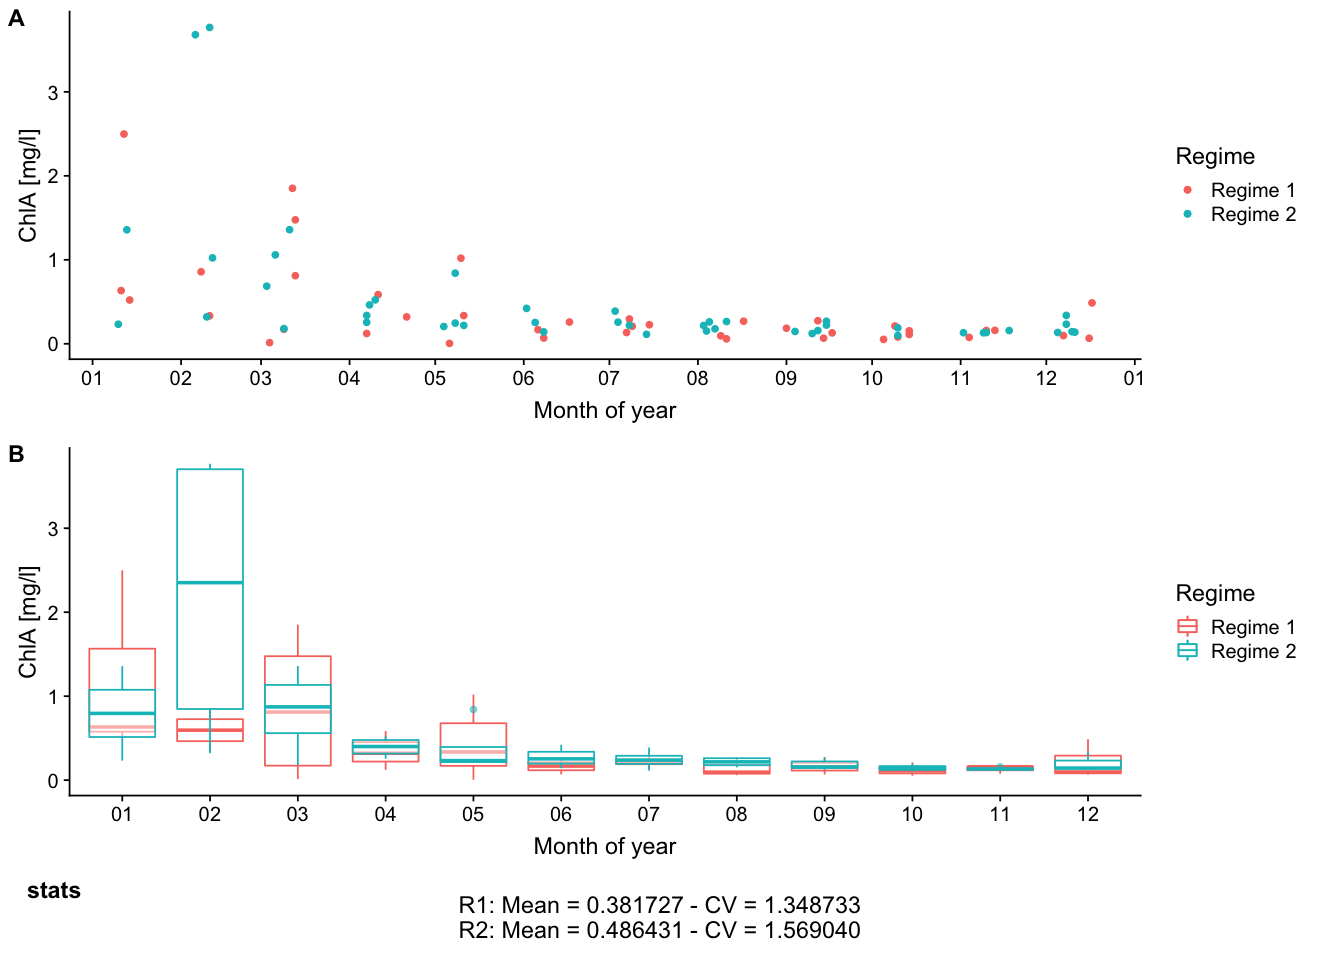

In [24]:
options(repr.plot.width=11, repr.plot.height=8)
ChlAmeanR1 <- mean(ChlA_above_mld_R1$ChlA, na.rm=T)
ChlAmeanR2 <- mean(ChlA_above_mld_R2$ChlA, na.rm=T)
ChlAcvR1 <- sd(ChlA_above_mld_R1$ChlA, na.rm=T)/mean(ChlA_above_mld_R1$ChlA, na.rm=T)
ChlAcvR2 <- sd(ChlA_above_mld_R2$ChlA, na.rm=T)/mean(ChlA_above_mld_R2$ChlA, na.rm=T)
ChlAstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", ChlAmeanR1, ChlAcvR1, ChlAmeanR2, ChlAcvR2))
plot_grid(ChlA_1, ChlA_2, ChlAstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [26]:
ggsave('ChlAHPLC.png', width=11, height= 8)

In [20]:
Si1 <- SiOH_above_mld_R1 %>% 
        group_by(month) %>% 
        summarise(
            dyear = mean(dyear),
            mean = mean(SiOH, na.rm=T),
            median = median(SiOH, na.rm=T)
        )

Si2 <- SiOH_above_mld_R2 %>% 
        group_by(month) %>% 
        summarise(
            dyear = mean(dyear),
            mean = mean(SiOH, na.rm=T),
            median = median(SiOH, na.rm=T)
        )

Warning message:
“Removed 24 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

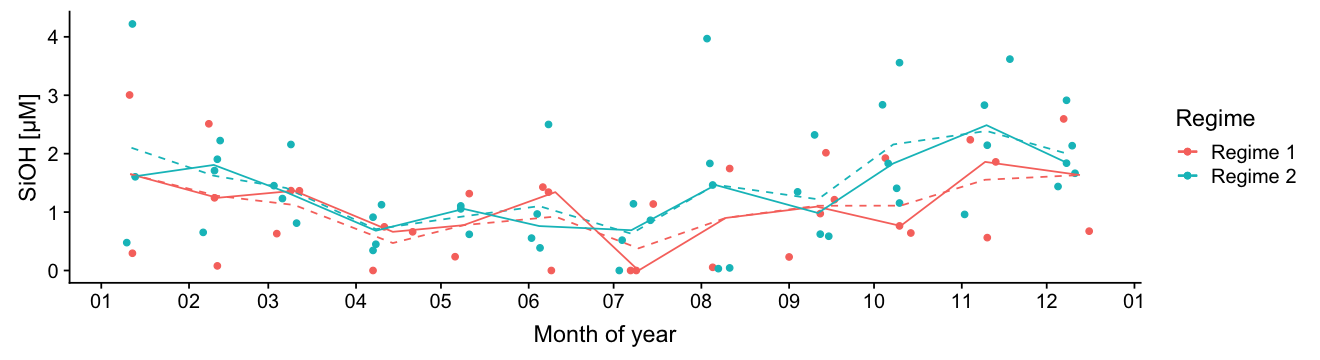

In [21]:
options(repr.plot.width=11, repr.plot.height=3)
ggplot() + geom_point(data=SiOH_above_mld_R1,aes(x=dyear, y=SiOH, col='Regime 1'))+ #scale_y_continuous(trans = 'reverse', limits = c(70,0), breaks=seq(70,0,-10))+
geom_point(data=SiOH_above_mld_R2,aes(x=dyear, y=SiOH, col='Regime 2')) +
geom_line(data=Si1,aes(x=dyear, y=mean, col='Regime 1'), linetype=2) +
geom_line(data=Si2,aes(x=dyear, y=mean, col='Regime 2'), linetype=2) +
geom_line(data=Si1,aes(x=dyear, y=median, col='Regime 1'), linetype=1) +
geom_line(data=Si2,aes(x=dyear, y=median, col='Regime 2'), , linetype=1) +
scale_x_date(date_breaks = 'months', labels = date_format('%m'))+
ylab('SiOH [µM]') + xlab('Month of year') + labs(col='Regime')

# write N above MLD into csv

In [22]:
SiOH_above_R1 <- data.frame(SiOH = SiOH_above_mld_R1$SiOH, month = SiOH_above_mld_R1$month, yday = SiOH_above_R1yday)
SiOH_above_R2 <- data.frame(SiOH = SiOH_above_mld_R2$SiOH, month = SiOH_above_mld_R2$month, yday = SiOH_above_R2yday)

In [23]:
# Write CSV in R
write.csv(SiOH_above_R1, file = "DATA_modelverification/SiOH_above_R1.csv")
write.csv(SiOH_above_R2, file = "DATA_modelverification/SiOH_above_R2.csv")